In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
# pip install split-folders

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 12804 images belonging to 10 classes.


In [40]:
train_generator.labels

array([0, 0, 0, ..., 9, 9, 9])

In [5]:
train_generator.class_indices


{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.36017036 0.3562488  0.34840566]
  [0.36148444 0.35756287 0.34971973]
  [0.36279848 0.3588769  0.35103378]
  ...
  [0.48235297 0.48235297 0.47450984]
  [0.48168263 0.48168263 0.4738395 ]
  [0.47710833 0.47710833 0.4692652 ]]

 [[0.360114   0.35619244 0.3483493 ]
  [0.35985118 0.3559296  0.34808648]
  [0.35958838 0.35566682 0.34782368]
  ...
  [0.48235297 0.48235297 0.47450984]
  [0.48141983 0.48141983 0.4735767 ]
  [0.47658274 0.47658274 0.4687396 ]]

 [[0.38996604 0.38604447 0.37820134]
  [0.38760075 0.38367918 0.37583604]
  [0.38523543 0.38131386 0.37347072]
  ...
  [0.48235297 0.48235297 0.47450984]
  [0.481157   0.481157   0.47331387]
  [0.4760571  0.4760571  0.46821398]]

 ...

 [[0.4105776  0.4105776  0.40273446]
  [0.41721594 0.41721594 0.4093728 ]
  [0.43047503 0.43047503 0.4226319 ]
  ...
  [0.5613988  0.56924194 0.55747724]
  [0.5629757  0.57081884 0.55905414]
  [0.56455255 0.5723957  0.560631  ]]

 [[0.4108404  0.4108404  0.40299726]
  [0.41774157 0.41774157 0.40989843]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5015319  0.47015938 0.52898294]
  [0.48999912 0.45862657 0.5174501 ]
  [0.46608174 0.4347092  0.49353272]
  ...
  [0.509962   0.48251107 0.54525614]
  [0.51732916 0.48987815 0.5526233 ]
  [0.52469623 0.49724525 0.55999035]]

 [[0.49113134 0.45975876 0.5185823 ]
  [0.49303263 0.4616601  0.5204836 ]
  [0.4686819  0.43730935 0.49613288]
  ...
  [0.5938798  0.56895155 0.62665117]
  [0.6042804  0.5797855  0.6366184 ]
  [0.61468095 0.59061944 0.64658564]]

 [[0.4807307  0.44935817 0.50818175]
  [0.49606612 0.46469358 0.52351713]
  [0.47128204 0.4399095  0.498733  ]
  ...
  [0.56498224 0.5414528  0.5963548 ]
  [0.5541483  0.5306189  0.58552086]
  [0.54331434 0.5197849  0.5746869 ]]

 ...

 [[0.6481422  0.63245595 0.6873579 ]
  [0.65204245 0.6363562  0.69125813]
  [0.6559427  0.64025635 0.69515836]
  ...
  [0.6976924  0.6937708  0.7486728 ]
  [0.69299376 0.6890722  0.74397415]
  [0.71178705 0.7078655  0.76276743]]

 [[0.6725785  0.65795636 0.7128584 ]
  [0.6678115  0.6540562  0.70895815]


In [11]:
len(class_names)

10

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    verbose=1,
    epochs=20,
)

Epoch 1/20
401/401 [==============================] - 854s 2s/step - loss: 1.5817 - accuracy: 0.4286 - val_loss: 1.0353 - val_accuracy: 0.6331
Epoch 2/20
401/401 [==============================] - 719s 2s/step - loss: 0.8275 - accuracy: 0.7092 - val_loss: 0.7418 - val_accuracy: 0.7370
Epoch 3/20
401/401 [==============================] - 724s 2s/step - loss: 0.6057 - accuracy: 0.7825 - val_loss: 0.7571 - val_accuracy: 0.7214
Epoch 4/20
401/401 [==============================] - 716s 2s/step - loss: 0.4958 - accuracy: 0.8231 - val_loss: 0.4175 - val_accuracy: 0.8585
Epoch 5/20
401/401 [==============================] - 719s 2s/step - loss: 0.4036 - accuracy: 0.8602 - val_loss: 0.3495 - val_accuracy: 0.8829
Epoch 6/20
401/401 [==============================] - 717s 2s/step - loss: 0.3513 - accuracy: 0.8732 - val_loss: 0.3590 - val_accuracy: 0.8854
Epoch 7/20
401/401 [==============================] - 710s 2s/step - loss: 0.2992 - accuracy: 0.8928 - val_loss: 0.3114 - val_accuracy: 0.9036

In [18]:
model.save("Tomato.h5")


In [19]:
scores = model.evaluate(test_generator)


51/51 [==============================] - 55s 1s/step - loss: 0.2088 - accuracy: 0.9540


In [20]:
history


In [21]:
history.params


{'verbose': 1, 'epochs': 20, 'steps': 401}

In [22]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

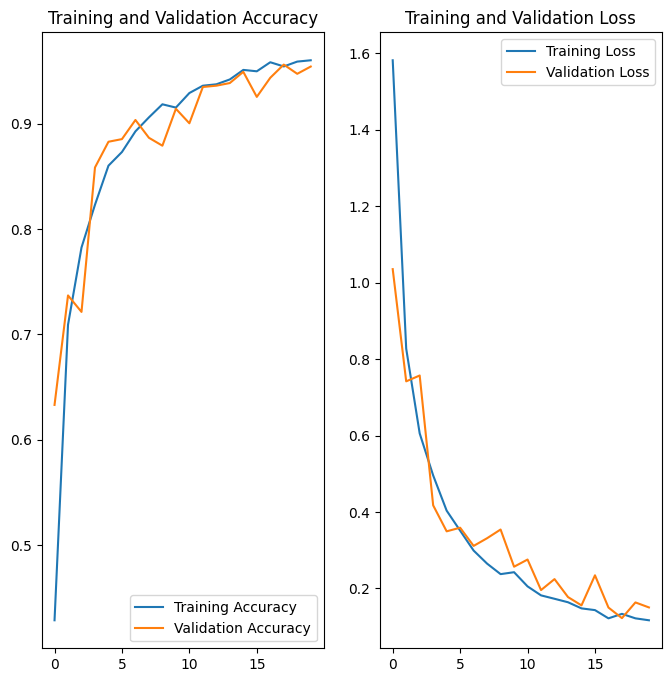

In [24]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Spider_mites_Two_spotted_spider_mite
1/1 [==============================] - 0s 337ms/step
[1.6108008e-09 1.4881663e-06 4.6381515e-06 9.6838034e-05 1.1175225e-08
 9.9987602e-01 2.0153206e-05 1.5300820e-08 1.1716295e-08 7.6446156e-07]
predicted label: Tomato_Spider_mites_Two_spotted_spider_mite


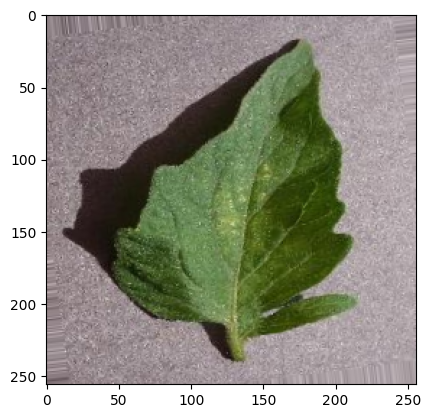

In [38]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[20]
    first_label = int(label_batch[20])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[20])
    print("predicted label:",class_names[np.argmax(batch_prediction[20])])
    
    break

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


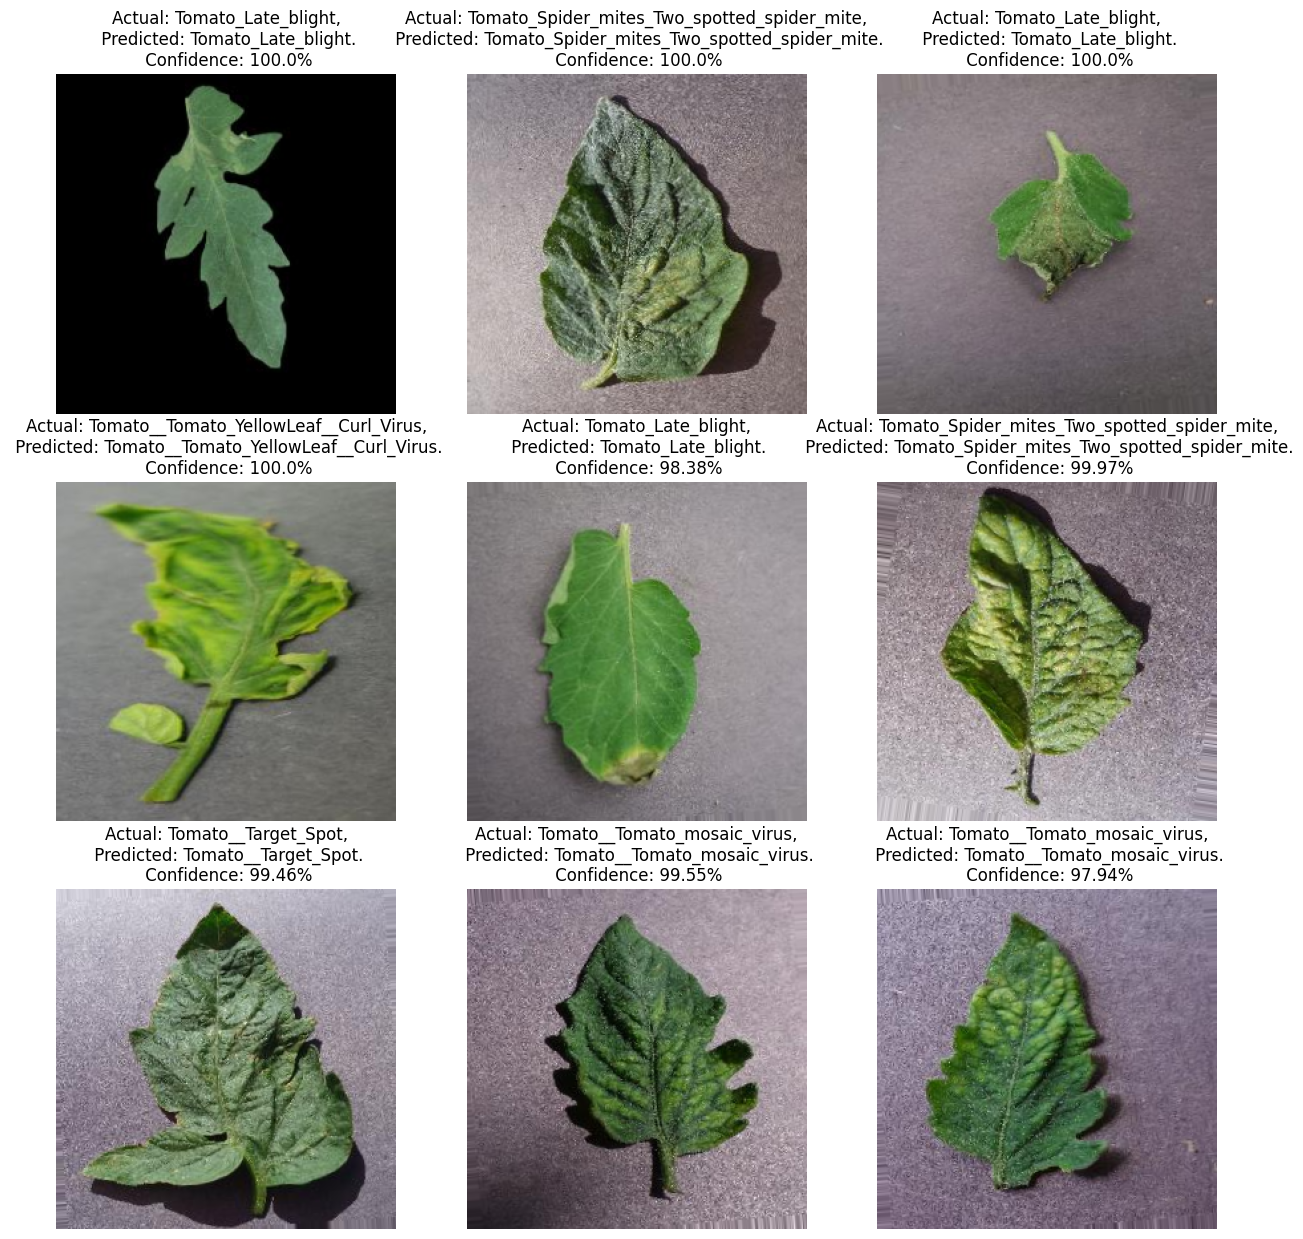

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [41]:
testmodel = tf.keras.models.load_model("Tomato.h5")


1/1 [==============================] - 0s 36ms/step


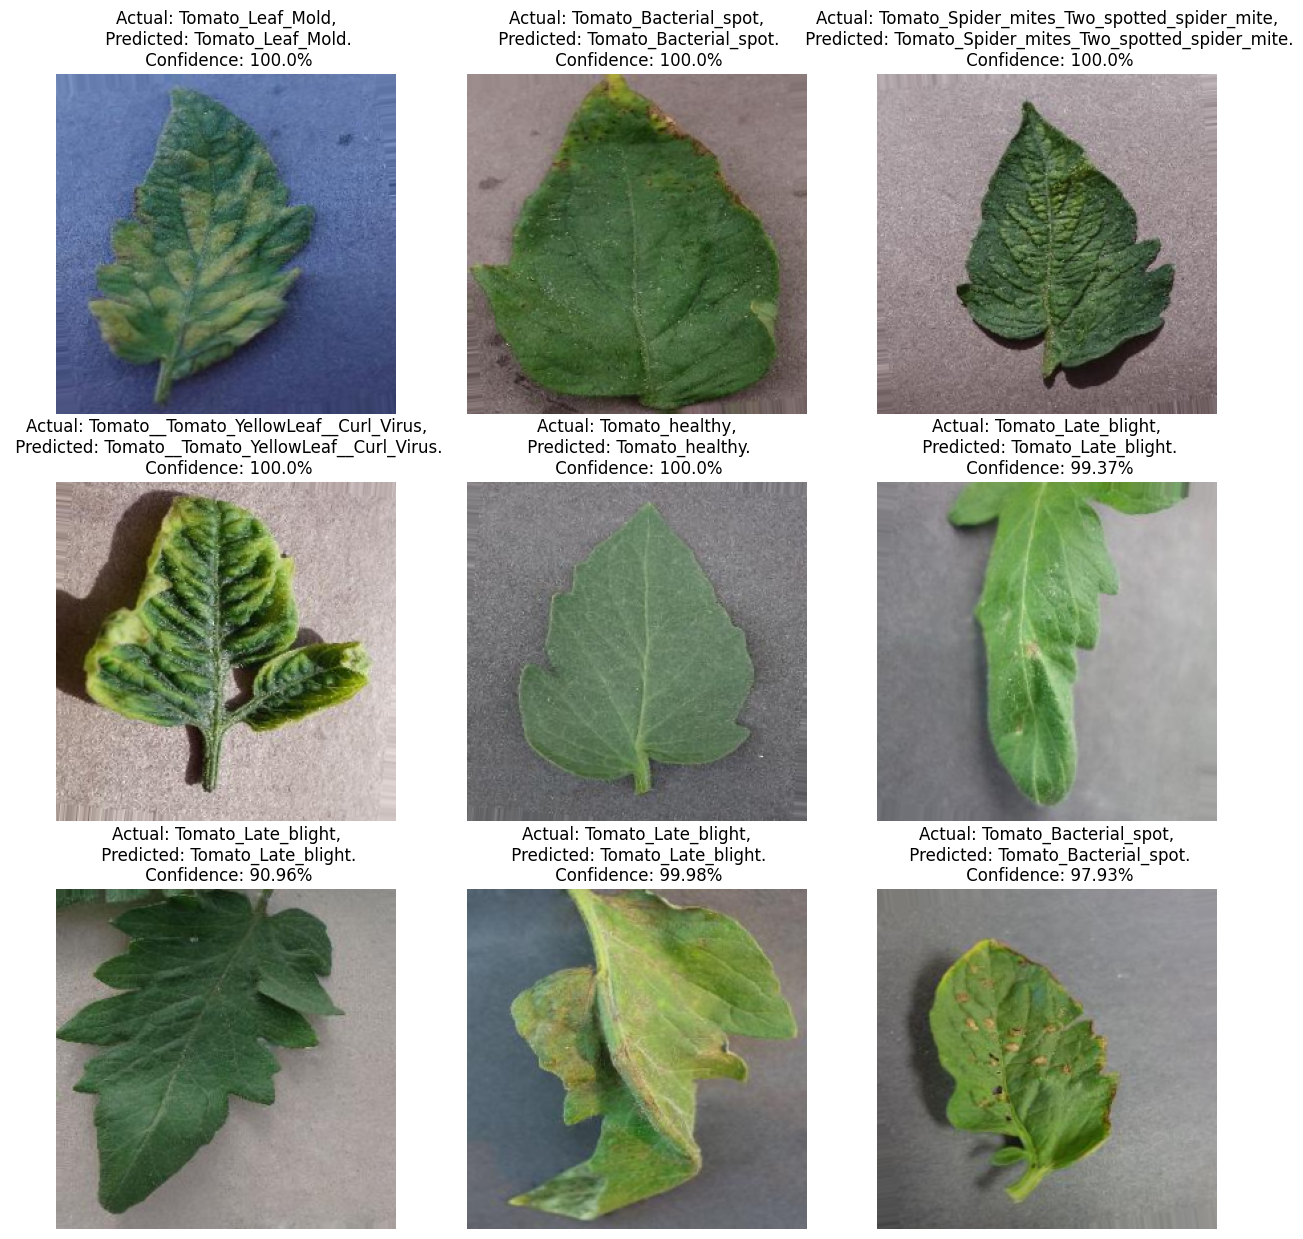

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(testmodel, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

first image to predict
actual label: Tomato_Late_blight
1/1 [==============================] - 0s 333ms/step
[2.8890120e-02 1.9992420e-02 3.8722867e-01 7.5113919e-04 5.4901564e-01
 1.1593179e-06 6.6429682e-05 1.3962731e-02 1.0612741e-06 9.0600966e-05]
predicted label: Tomato_Septoria_leaf_spot


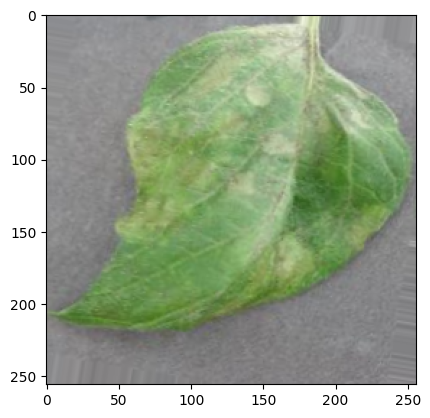

In [45]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[20]
    first_label = int(label_batch[20])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = testmodel.predict(image_batch)
    print(batch_prediction[20])
    print("predicted label:",class_names[np.argmax(batch_prediction[20])])
    
    break

In [46]:
testmodel

In [82]:
testimage = test_generator[0][0][1]

In [83]:
img_batch = np.expand_dims(testimage, 0)

In [84]:
img_batch.shape

(1, 256, 256, 3)

In [85]:
pred = testmodel.predict(img_batch)

1/1 [==============================] - 0s 57ms/step


In [86]:
print(np.max(pred))

0.9991954


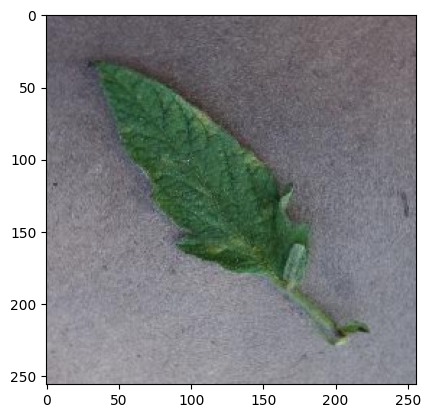

In [87]:
plt.imshow(testimage)


In [89]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


In [90]:
model.save("Tomato2.h5")

In [131]:
def preprocess_image(image_path):
    image = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    image = tf.cast(image, dtype=tf.float32)
    image = tf.image.resize_with_pad(image, 256, 256)
    image = tf.keras.applications.inception_resnet_v2.preprocess_input(image)
    return image

In [132]:
def test_new_image(image_path, model):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    # Reshape the image to match the model's input shape
    reshaped_image = tf.reshape(preprocessed_image, (1, 256, 256, 3))
    # Make predictions
    predictions = model.predict(reshaped_image)
    # Process the predictions (e.g., convert to labels or perform post-processing)
    # ...
    # Return the predictions or any other desired output
    return predictions

In [134]:
pred = test_new_image('C:\\Freelancing\\Tomato diases\\output\\test\\Tomato_Spider_mites_Two_spotted_spider_mite\\0dd13a82-3fd8-426b-8a87-4e695c92d3b2___Com.G_SpM_FL 8829.JPG',testmodel)

1/1 [==============================] - 0s 79ms/step


In [135]:
pred_label = np.argmax(pred[0])
predicted_class = class_names[np.argmax(pred[0])]
confidence = np.max(pred[0])

In [136]:
class_names


['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [137]:
pred_label , predicted_class , confidence

(1, 'Tomato_Early_blight', 1.0)